Sanity checking the CIC Emu to make sure nothing went wrong there. 

In [91]:
from pearce.emulator import NashvilleHot
from GPy.kern import *
import numpy as np
from os import path

In [92]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [93]:
training_file = '/scratch/users/swmclau2/cic_zheng07_v2/PearceCICCosmo.hdf5'

In [94]:
em_method = 'gp'

In [95]:
fixed_params = {'z':0.0}

In [96]:
df = 0.5

In [97]:
emu = NashvilleHot(training_file, fixed_params = fixed_params, downsample_factor = df)

(array([], dtype=int64), array([], dtype=int64))


In [112]:
test_file = '/home/users/swmclau2/scratch/cic_zheng07_test_v2/PearceCICCosmoTest.hdf5'
#test_file = '/home/users/swmclau2/scratch/cic_zheng07_v2/PearceCICCosmo.hdf5'

In [113]:
pred_y, data_y = emu.goodness_of_fit(test_file, downsample_factor = df,  statistic = None)

(array([], dtype=int64), array([], dtype=int64))


In [114]:
print (np.abs(10**pred_y - 10**data_y)/(10**data_y)).mean(axis =1)

[  2.27898842e-01   1.71738948e-01   4.79093958e-01   8.28133810e-01
   1.20916602e+00   1.61878495e+00   2.07879423e+00   2.66797814e+00
   4.78333960e+00   9.93945877e+01   4.30093288e+03   2.88987709e+03
   1.32921022e+03   7.15235783e+02   3.17355063e+02]


In [115]:
print (np.abs(pred_y - data_y)/np.abs(data_y)).mean(axis =1)

[ 0.52150524  0.10005126  0.13532477  0.14389907  0.14570844  0.14474397
  0.14273493  0.14118564  0.14129664  0.17271866  0.2055437   0.14502378
  0.08220607  0.05851708  0.04546663]


In [116]:
emu._y_mean

array([-0.38972518, -0.65436999, -0.96248104, -1.26782625, -1.56161432,
       -1.8421254 , -2.10964311, -2.36543014, -2.61090864, -2.4689733 ,
       -3.79634855, -5.72953524, -7.01299247, -7.79401108, -8.35893625])

In [117]:
idx = 100

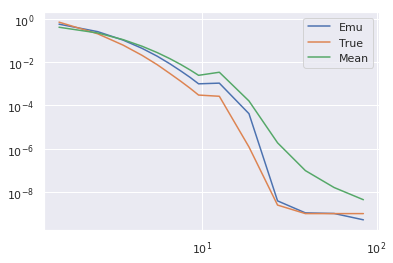

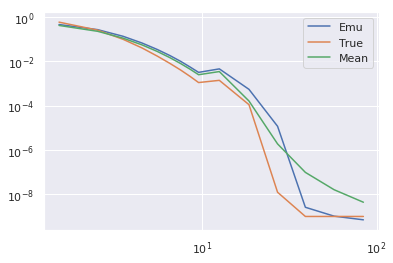

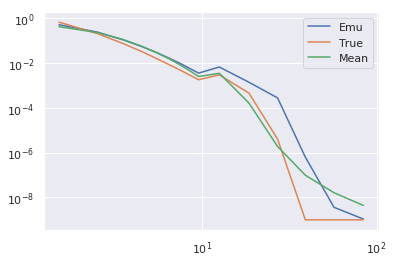

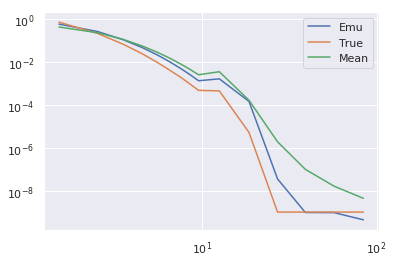

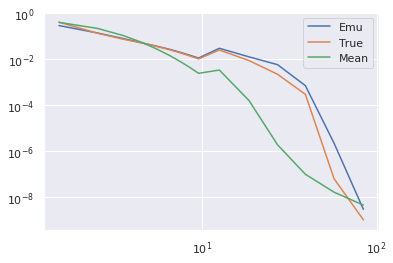

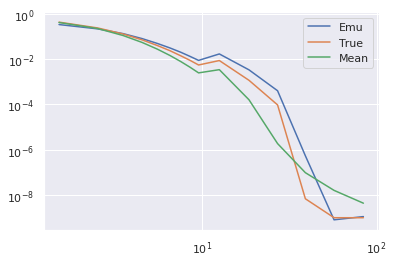

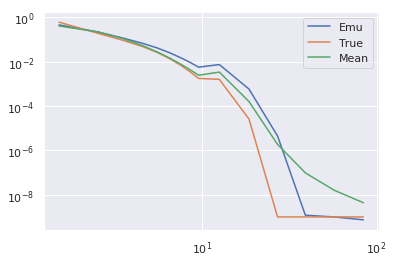

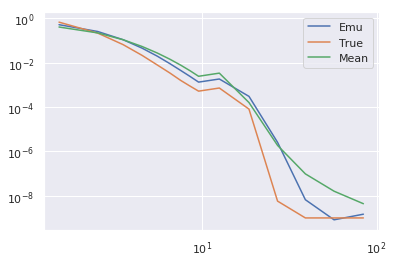

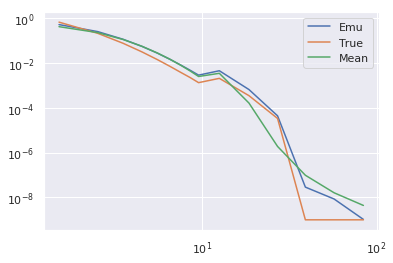

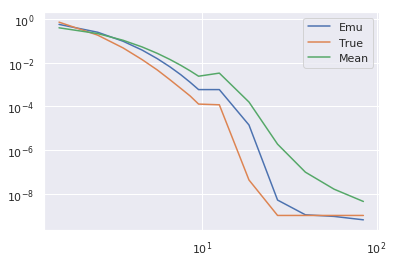

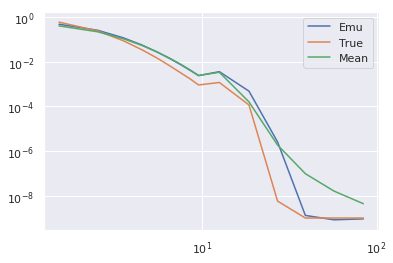

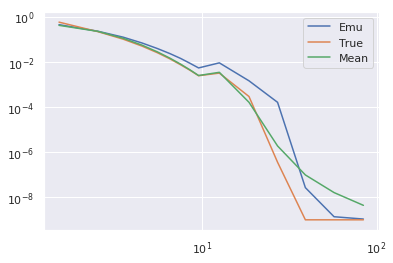

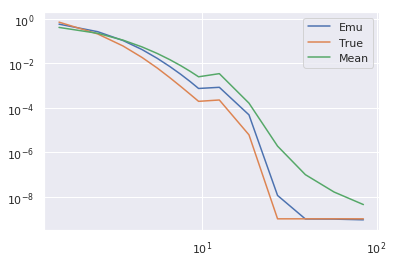

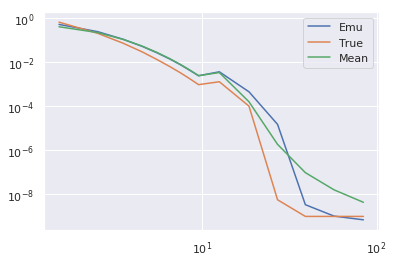

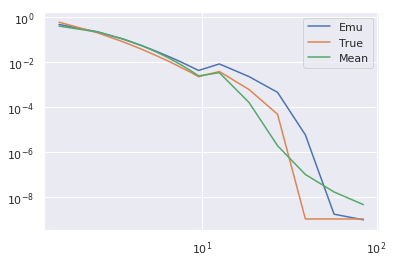

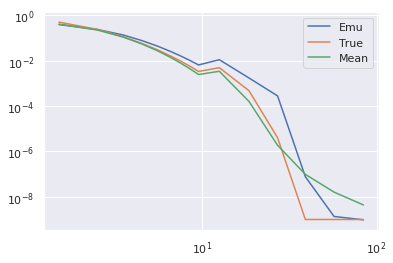

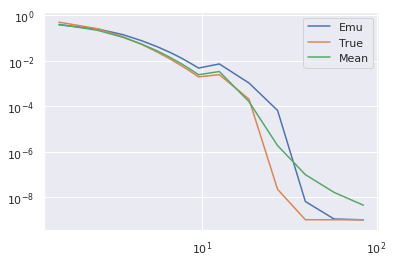

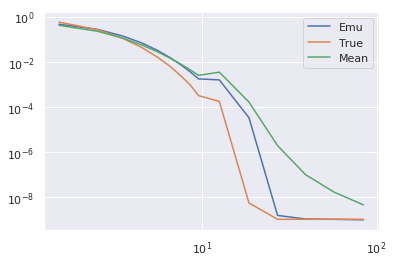

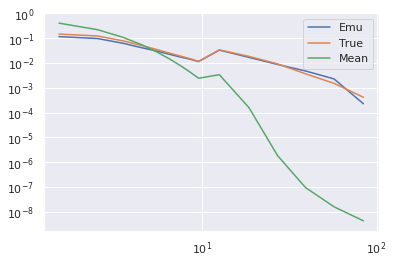

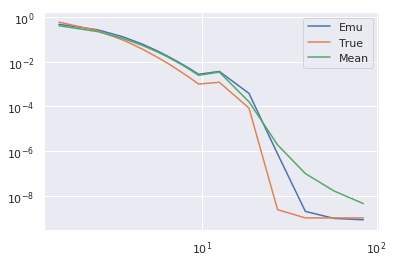

In [118]:
for idx in np.random.choice(pred_y.shape[1], 20, replace = False):
    plt.plot(emu.scale_bin_centers, 10**pred_y[:, idx], label = 'Emu')
    plt.plot(emu.scale_bin_centers, 10**data_y[:, idx], label = 'True')
    plt.plot(emu.scale_bin_centers, 10**emu._y_mean, label = 'Mean')

    #plt.yscale('log')
    plt.loglog();
    plt.legend(loc = 'best')
    plt.show();

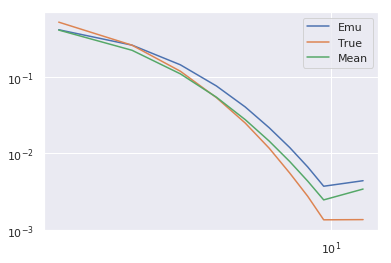

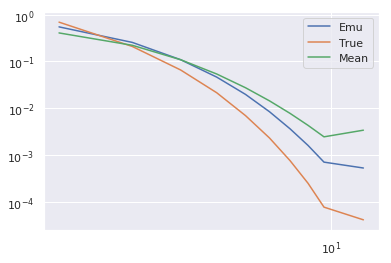

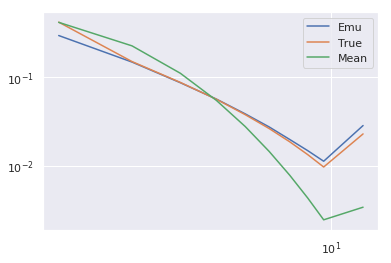

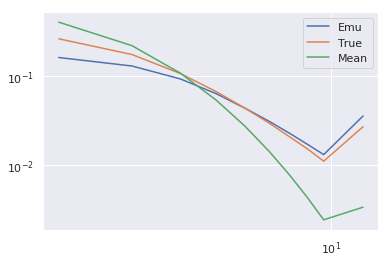

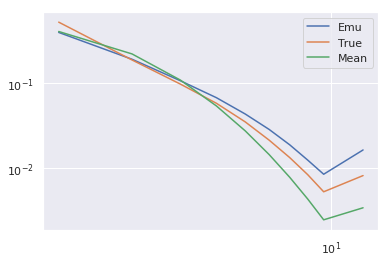

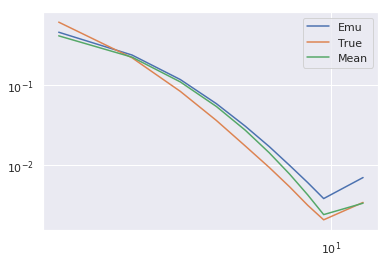

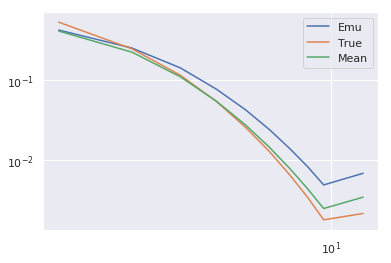

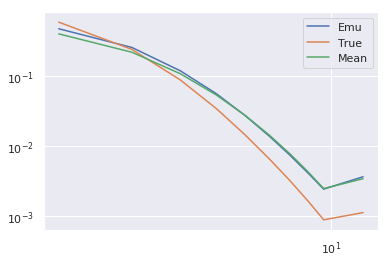

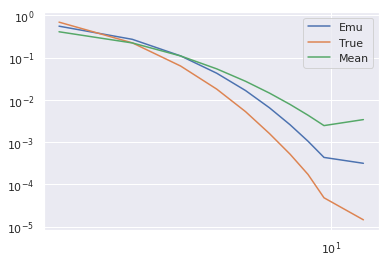

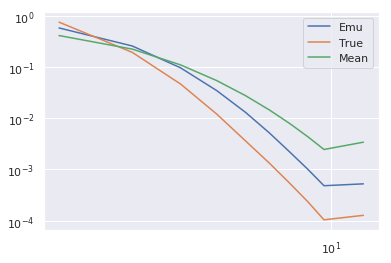

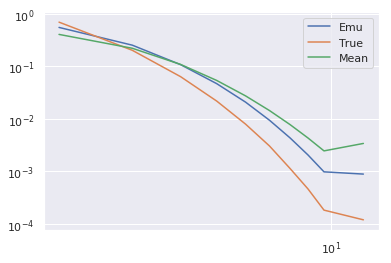

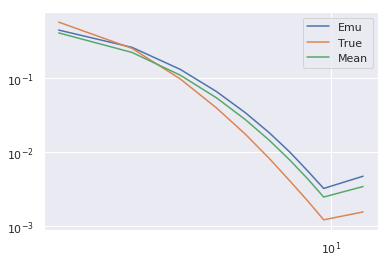

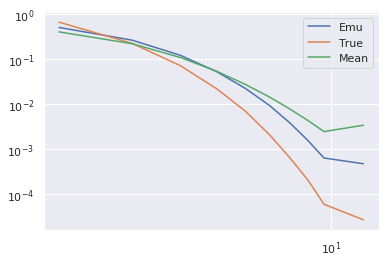

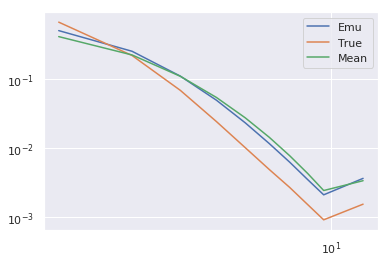

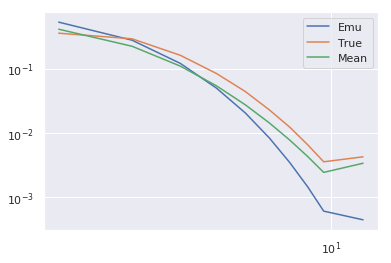

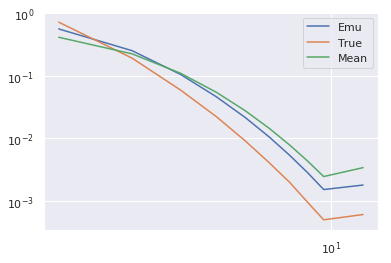

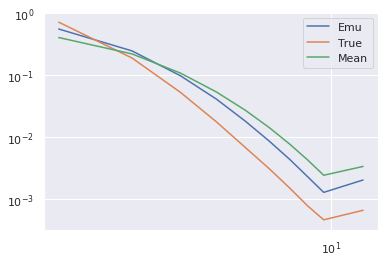

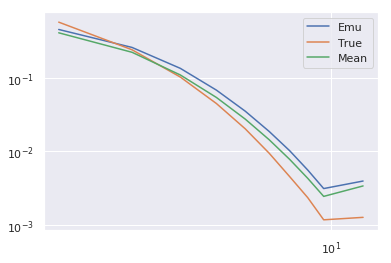

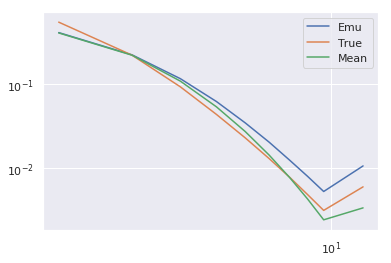

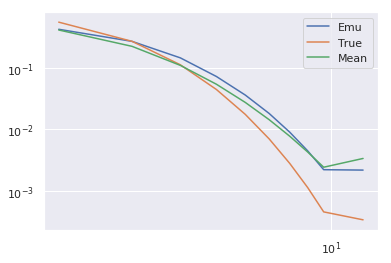

In [119]:
for idx in np.random.choice(pred_y.shape[1], 20, replace = False):
    plt.plot(emu.scale_bin_centers[:10], 10**pred_y[:10, idx], label = 'Emu')
    plt.plot(emu.scale_bin_centers[:10], 10**data_y[:10, idx], label = 'True')
    plt.plot(emu.scale_bin_centers[:10], 10**emu._y_mean[:10], label = 'Mean')

    #plt.yscale('log')
    plt.loglog();
    plt.legend(loc = 'best')
    plt.show();

In [126]:
test_mean = data_y.mean(axis = 1)
test_std = data_y.std(axis = 1)

In [131]:
data = emu.y.reshape((15, -1))

In [138]:
train_mean = data.mean(axis = 1 )
train_std = data.std(axis = 1)

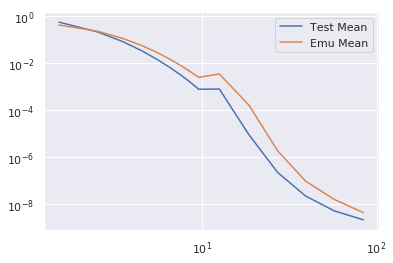

In [121]:
plt.plot(emu.scale_bin_centers, 10**test_mean, label = 'Test Mean')
plt.plot(emu.scale_bin_centers, 10**emu._y_mean, label = 'Emu Mean')

#plt.yscale('log')
plt.loglog();
plt.legend(loc = 'best')
plt.show();

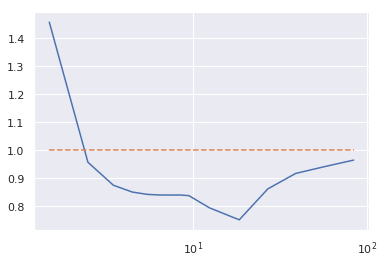

In [122]:
plt.plot(emu.scale_bin_centers, emu._y_mean/test_mean)
plt.plot(emu.scale_bin_centers, np.ones_like(emu.scale_bin_centers), ls = '--')

plt.xscale('log')
#plt.loglog();
#plt.legend(loc = 'best')
plt.show();

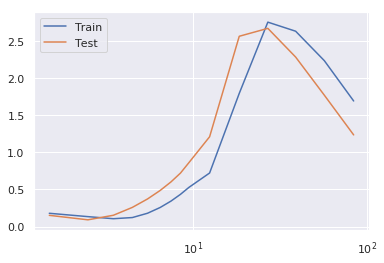

In [142]:
plt.plot(emu.scale_bin_centers, train_std, label = 'Train')
plt.plot(emu.scale_bin_centers, test_std, label = 'Test')
plt.legend(loc='best')
plt.xscale('log')
plt.show();

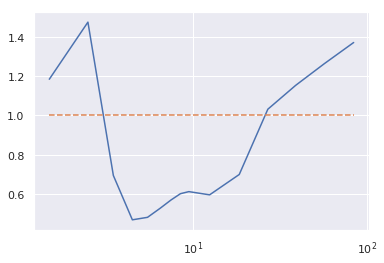

In [144]:
plt.plot(emu.scale_bin_centers, train_std/test_std)
plt.plot(emu.scale_bin_centers, np.ones_like(emu.scale_bin_centers), ls = '--')

plt.xscale('log')
#plt.loglog();
#plt.legend(loc = 'best')
plt.show();

In [123]:
bins = np.logspace(0, 2, 15)
print bins
print np.round(bins)

[   1.            1.38949549    1.93069773    2.6826958     3.72759372
    5.17947468    7.19685673   10.           13.89495494   19.30697729
   26.82695795   37.2759372    51.79474679   71.9685673   100.        ]
[   1.    1.    2.    3.    4.    5.    7.   10.   14.   19.   27.   37.
   52.   72.  100.]


In [124]:
a = np.arange(1, 10, 1)
b = np.round(np.logspace(1., 2, 7)).astype(int)
c = np.r_[a, b]

In [125]:
c

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  15,  22,  32,
        46,  68, 100])